# Toxic Comment Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


%pylab inline
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

ImportError: dlopen(/Users/Ruta/anaconda/lib/python3.5/site-packages/matplotlib/ft2font.cpython-35m-darwin.so, 2): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /Users/Ruta/anaconda/lib/libfreetype.6.dylib
  Reason: Incompatible library version: libfreetype.6.dylib requires version 45.0.0 or later, but libpng16.16.dylib provides version 39.0.0

### Import Data

In [2]:
data = pd.read_csv('train.csv', header=0)

training_split = 0.8;
train_samples = int(training_split * data.values.shape[0]) - 1

train = data.values[0:train_samples, :]
val = data.values[train_samples:, :]

In [3]:
comments_num, attr_num = train.shape
print("Number of comments: ", comments_num)
print("Number of attributes: ", attr_num)
print("Attributes: ", data.columns.values)

Number of comments:  127655
Number of attributes:  8
Attributes:  ['id' 'comment_text' 'toxic' 'severe_toxic' 'obscene' 'threat' 'insult'
 'identity_hate']


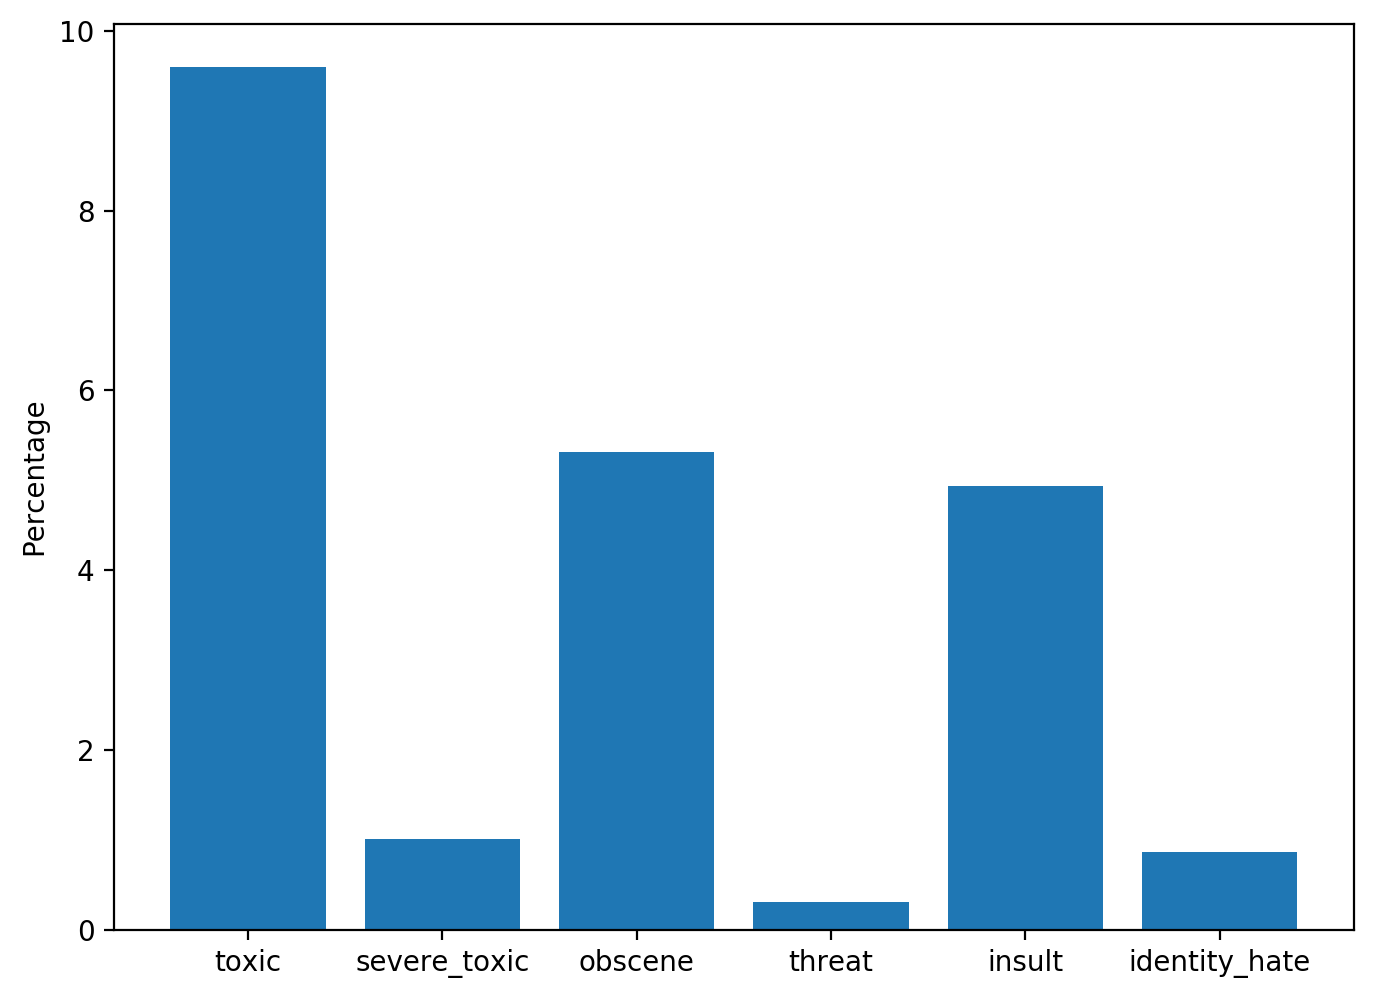

In [4]:
class_dist = train[:, 2:].sum(axis=0) * (100/comments_num)
fig = plt.figure(figsize=(8,6));
plt.bar(np.arange(6), height=class_dist);
plt.xticks(np.arange(6), data.columns.values[2:]);
plt.ylabel('Percentage')

In [5]:
val.shape

(31916, 8)

In [6]:
y_train = train[:, 2:]
y_test = val[:, 2:]

train_text = train[:, 1]
test_text = val[:, 1]

max_word_count = 30000
tokenizer = Tokenizer(num_words=max_word_count)
tokenizer.fit_on_texts(list(train_text))
train_tokenized = tokenizer.texts_to_sequences(train_text)
test_tokenized = tokenizer.texts_to_sequences(test_text)

In [7]:
train_tokenized[:1]

[[675,
  76,
  1,
  127,
  130,
  177,
  29,
  662,
  4585,
  12612,
  1090,
  86,
  333,
  51,
  2291,
  11081,
  50,
  6975,
  15,
  60,
  2778,
  146,
  7,
  2952,
  34,
  116,
  1205,
  14350,
  2766,
  4,
  45,
  59,
  245,
  1,
  377,
  32,
  1,
  37,
  27,
  144,
  74,
  3619,
  89,
  3010,
  4417,
  2180,
  1003]]

In [8]:
maxlen = 300
trainX = pad_sequences(train_tokenized, maxlen=maxlen)
testX = pad_sequences(test_tokenized, maxlen=maxlen)

In [9]:
#Random Model
model = Sequential()
model.add(Dense(32, input_shape=(maxlen,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [10]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [11]:
y_test.shape

(31916, 6)

In [12]:
batch_size = 128
epochs = 5

model.fit(trainX, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, y_test))

score = model.evaluate(testX, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 127655 samples, validate on 31916 samples
Epoch 1/5
127655/127655 [==============================] - 3s 26us/step - loss: 0.6838 - acc: 0.9569 - val_loss: 0.5838 - val_acc: 0.9631
Epoch 2/5
127655/127655 [==============================] - 3s 24us/step - loss: 0.5856 - acc: 0.9626 - val_loss: 0.6210 - val_acc: 0.9560
Epoch 3/5
127655/127655 [==============================] - 3s 23us/step - loss: 0.5757 - acc: 0.9618 - val_loss: 0.5634 - val_acc: 0.9628
Epoch 4/5
127655/127655 [==============================] - 3s 24us/step - loss: 0.5632 - acc: 0.9610 - val_loss: 0.5624 - val_acc: 0.9566
Epoch 5/5
127655/127655 [==============================] - 3s 23us/step - loss: 0.5339 - acc: 0.9593 - val_loss: 0.4967 - val_acc: 0.9604
Test loss: 0.49672259383512934
Test accuracy: 0.9603542541707574


In [13]:
comment = "And if he were a mere fellow editor, I wouldn't have any problem with him.  But since he seems to let the power of being an admin go to his head, I have an issue with him.  Please read what remains of his Talk page if you need examples of this.  I'm a moderator on a very popular internet discussion board, and I would never ignore a valid question from a user."
comment_tokenized = tokenizer.texts_to_sequences([comment])
commentX = pad_sequences(comment_tokenized, maxlen=maxlen)
commentX.shape
# testX = np.ndarray(commentX)

(1, 300)

In [14]:
# this is actually a right prediction. 
# The comment is from the training set so it already saw this before. 
# But the training/val losses are terrible.
model.predict(commentX)

array([[0., 0., 0., 0., 0., 0.]], dtype=float32)